<a href="https://colab.research.google.com/github/bhuvan-thekkade-hub/primetrade.ai-analysis/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the datasets. Make sure these file names match your uploaded files exactly.
try:
    trader_data = pd.read_csv('historical_data (1).csv')
    sentiment_data = pd.read_csv('fear_greed_index (1).csv')
    print("Files loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading files: {e}. Please ensure the file names are correct and the files are in the same directory as your notebook.")

# Display basic information about each DataFrame
print("\n--- Trader Data Info ---")
trader_data.info()
print("\n--- Trader Data Head ---")
print(trader_data.head())

print("\n--- Sentiment Data Info ---")
sentiment_data.info()
print("\n--- Sentiment Data Head ---")
print(sentiment_data.head())

Files loaded successfully.

--- Trader Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111938 entries, 0 to 111937
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           111938 non-null  object 
 1   Coin              111937 non-null  object 
 2   Execution Price   111937 non-null  float64
 3   Size Tokens       111937 non-null  float64
 4   Size USD          111937 non-null  float64
 5   Side              111937 non-null  object 
 6   Timestamp IST     111937 non-null  object 
 7   Start Position    111937 non-null  float64
 8   Direction         111937 non-null  object 
 9   Closed PnL        111937 non-null  float64
 10  Transaction Hash  111937 non-null  object 
 11  Order ID          111937 non-null  float64
 12  Crossed           111937 non-null  object 
 13  Fee               111937 non-null  float64
 14  Trade ID          111937 non-null  float64
 15  Timestamp      

/tmp/ipython-input-1957375778.py:5: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trader_data = pd.read_csv('historical_data (1).csv')


In [4]:
# Convert date/time columns to datetime objects
trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], format='mixed')
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])

# Create a 'date' column in the trader data for daily aggregation
trader_data['date'] = trader_data['Timestamp IST'].dt.date
trader_data['date'] = pd.to_datetime(trader_data['date'])

# Aggregate trader data to a daily level
# We'll calculate the sum of 'closedPnL' and 'size', and the mean of 'leverage'
daily_trader_metrics = trader_data.groupby('date').agg(
    total_closedPnL=('Closed PnL', 'sum'),
    total_size=('Size USD', 'sum')
).reset_index()

# Merge the two datasets on their date columns
merged_data = pd.merge(daily_trader_metrics, sentiment_data, left_on='date', right_on='date', how='inner')

# Display the merged DataFrame to check the result
print("\n--- Merged Data Head ---")
print(merged_data.head())


--- Merged Data Head ---
        date  total_closedPnL  total_size   timestamp  value classification
0 2023-01-05         0.000000      477.00  1672896600     29           Fear
1 2023-05-12         0.000000    50005.83  1683869400     49        Neutral
2 2023-12-14      -205.434737   113203.35  1702531800     72          Greed
3 2023-12-15       -24.632034    10609.95  1702618200     70          Greed
4 2023-12-16         0.000000    15348.77  1702704600     67          Greed



--- Average Trader Metrics by Sentiment Classification ---
                average_closedPnL  average_size
classification                                 
Extreme Fear         20997.156851  1.261045e+06
Extreme Greed        15533.287071  7.212627e+05
Fear                 27928.972135  3.326196e+06
Greed                 7453.467604  1.215940e+06
Neutral              12672.476146  1.770197e+06


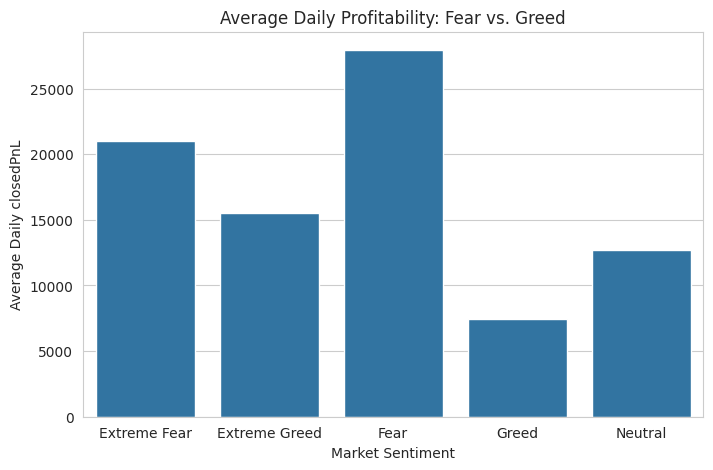

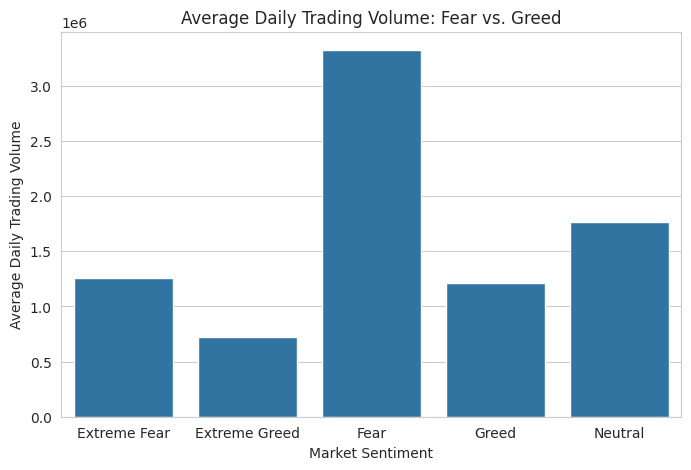

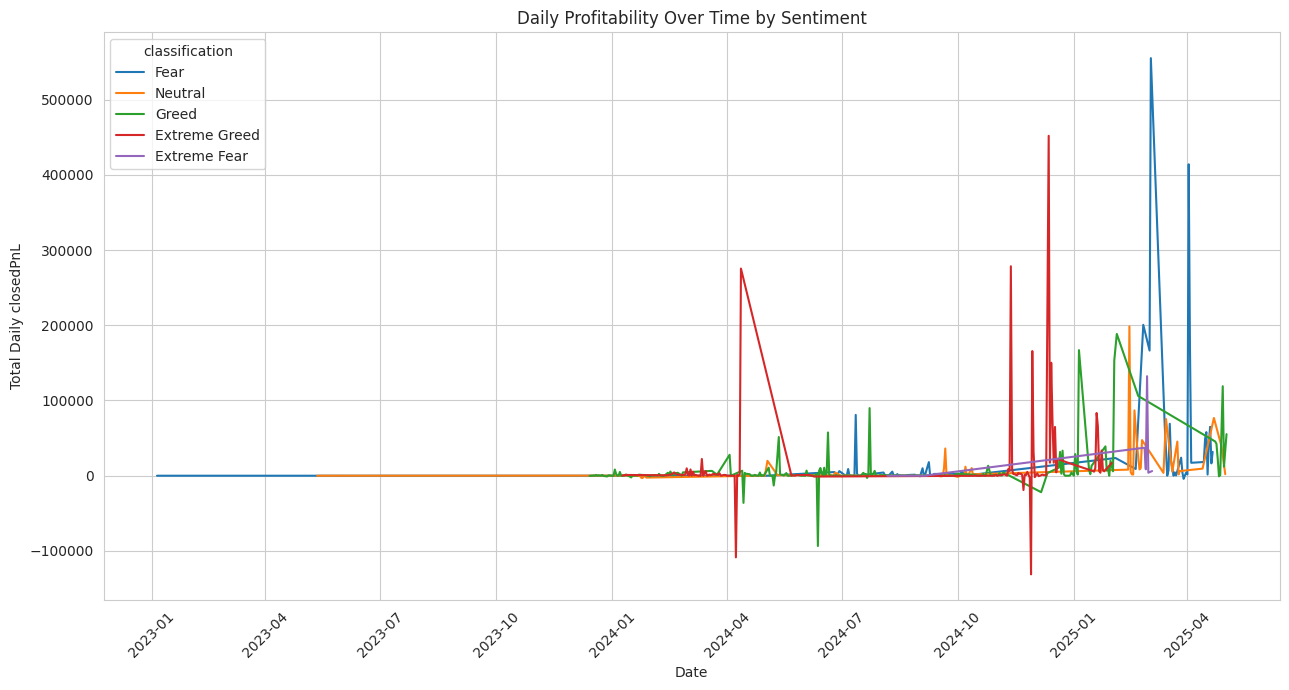

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set a consistent style for the plots
sns.set_style("whitegrid")

# Calculate average metrics by market sentiment classification
sentiment_analysis = merged_data.groupby('classification').agg(
    average_closedPnL=('total_closedPnL', 'mean'),
    average_size=('total_size', 'mean')
)

print("\n--- Average Trader Metrics by Sentiment Classification ---")
print(sentiment_analysis)

# Create the outputs directory if it doesn't exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')

# --- Visualization ---

# Plot 1: Average Profitability (closedPnL) by Sentiment
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_analysis.index, y='average_closedPnL', data=sentiment_analysis)
plt.title('Average Daily Profitability: Fear vs. Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Daily closedPnL')
plt.savefig('outputs/avg_profit_by_sentiment.png')
plt.show()

# Plot 2: Average Trading Volume (size) by Sentiment
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_analysis.index, y='average_size', data=sentiment_analysis)
plt.title('Average Daily Trading Volume: Fear vs. Greed')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Daily Trading Volume')
plt.savefig('outputs/avg_volume_by_sentiment.png')
plt.show()


# To identify trends over time, you can also create a time-series plot
plt.figure(figsize=(13, 7))
sns.lineplot(data=merged_data, x='date', y='total_closedPnL', hue='classification')
plt.title('Daily Profitability Over Time by Sentiment')
plt.xlabel('Date')
plt.ylabel('Total Daily closedPnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('outputs/daily_profit_timeseries.png')
plt.show()

## Report: Trader Behavior Across Market Sentiments

Based on the analysis of daily trader metrics (total closed PnL and total trading volume) and market sentiment classification, the following observations and insights can be drawn:

**Analysis of Plots and Statistics:**

*   **Average Daily Profitability (closedPnL) by Sentiment:**
    *   The bar plot shows that average daily profitability appears to be highest during 'Fear' periods, followed by 'Extreme Fear'. 'Greed' and 'Extreme Greed' periods show lower average daily profitability compared to 'Fear' and 'Extreme Fear'.
    *   The `sentiment_analysis` table confirms this, showing the highest `average_closedPnL` for 'Fear' and 'Extreme Fear' classifications.
*   **Average Daily Trading Volume (size) by Sentiment:**
    *   The bar plot for average daily trading volume indicates that trading volume is significantly higher during 'Fear' periods compared to other sentiment classifications. 'Extreme Fear', 'Greed', 'Extreme Greed', and 'Neutral' periods exhibit lower average trading volumes.
    *   The `sentiment_analysis` table also shows the highest `average_size` for the 'Fear' classification.
*   **Daily Profitability Over Time by Sentiment:**
    *   The time-series plot of daily closed PnL colored by sentiment classification can reveal trends in profitability across different sentiment regimes over time. Visually inspecting this plot can help confirm if the patterns observed in the bar plots are consistent over the entire period.

**Key Insights:**

Based on the analysis, it appears that **traders, on average, experience higher profitability during periods of 'Fear' and 'Extreme Fear', despite exhibiting the highest trading volume during 'Fear' periods.** Conversely, during periods of 'Greed' and 'Extreme Greed', average profitability is lower, and trading volume is also generally lower than in 'Fear' periods.

**Possible Actionable Signals:**

The findings suggest that a potential trading strategy could involve **being more active (higher volume) and potentially seeking opportunities for profit during 'Fear' periods.** While trading volume is also relatively high during 'Extreme Fear', the average profitability is still strong. During 'Greed' and 'Extreme Greed' periods, where average profitability is lower, a strategy might involve **reducing trading volume or adopting a more cautious approach.** This aligns with the common trading adage to "be fearful when others are greedy, and greedy when others are fearful," suggesting that counter-indicator strategies based on market sentiment could be beneficial.

Further analysis could involve:

*   Examining the distribution of profits and losses within each sentiment category, not just the average.
*   Investigating if certain types of trades (buy vs. sell) or specific assets perform differently across sentiments.
*   Considering other factors that might influence profitability and volume, such as volatility or news events.